In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os

# Nama file sesuai unggahan Anda
filename = 'College Exam Result Dataset data hasil ujiangrade.csv'

if os.path.exists(filename):
    df = pd.read_csv(filename)
    print("✅ Dataset Mahasiswa berhasil dimuat!")
    print(f"Jumlah Data: {df.shape[0]} mahasiswa")
    print("\n--- Contoh Data ---")
    display(df[['Name', 'Result Description', 'SGPA', 'CGPA']].head())
else:
    print("❌ File tidak ditemukan. Pastikan nama file CSV sudah benar.")

✅ Dataset Mahasiswa berhasil dimuat!
Jumlah Data: 62 mahasiswa

--- Contoh Data ---


,Name,Result Description,SGPA,CGPA
0,AAKASH PIPALDE,PASS,7.08,6.71
1,AAYUSH PATEL,PASS,6.46,6.38
2,ABIR SAXENA,PASS WITH GRACE,5.38,5.50
3,AMEY BHOKARIKAR,PASS WITH GRACE,6.71,6.82
4,ANTIM JAMLE,Fail in AL401,5.33,5.29


Statistik Mahasiswa:
🟢 Aman (Lulus Murni): 48
🔴 Berisiko (Fail/Grace): 14


C:\Users\zak71\AppData\Local\Temp\ipykernel_19552\888807697.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status_Risiko', data=df, palette=['green', 'red'])


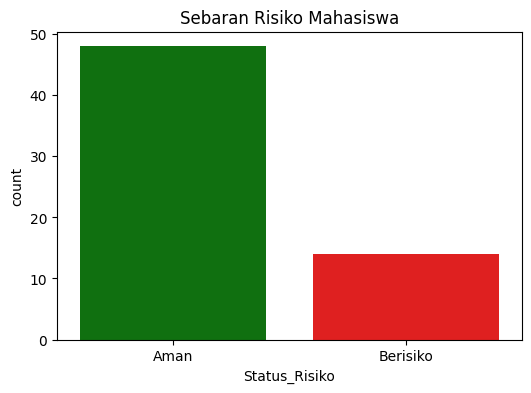

In [20]:
# 1. Membersihkan Data (Kadang ada data kosong/corrupt)
df = df.dropna(subset=['SGPA', 'CGPA', 'Result Description'])

# 2. Membuat Label Target (Risk Detection)
# Aturan: Jika 'PASS', maka Aman (0). Jika 'FAIL' atau 'PASS WITH GRACE', maka Berisiko (1).
def tentukan_risiko(status):
    if status == 'PASS':
        return 0 # Aman
    else:
        return 1 # Berisiko (Gagal / Butuh Bantuan)

df['Status_Risiko'] = df['Result Description'].apply(tentukan_risiko)

# Cek Distribusi
counts = df['Status_Risiko'].value_counts()
print("Statistik Mahasiswa:")
print(f"🟢 Aman (Lulus Murni): {counts.get(0, 0)}")
print(f"🔴 Berisiko (Fail/Grace): {counts.get(1, 0)}")

# Visualisasi
plt.figure(figsize=(6, 4))
sns.countplot(x='Status_Risiko', data=df, palette=['green', 'red'])
plt.xticks([0, 1], ['Aman', 'Berisiko'])
plt.title('Sebaran Risiko Mahasiswa')
plt.show()

In [21]:
# Menentukan Fitur (X) dan Target (y)
# Kita hanya ambil SGPA dan CGPA karena itu indikator paling kuat
X = df[['SGPA', 'CGPA']]
y = df['Status_Risiko']

# Split Data (80% Latih, 20% Uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih Model Random Forest
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

print("🤖 Model berhasil dilatih menggunakan data IPK dan IPS!")

🤖 Model berhasil dilatih menggunakan data IPK dan IPS!


In [22]:
# Inisialisasi Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training Model
model.fit(X_train, y_train)
print("🤖 Model Random Forest berhasil dilatih.")

🤖 Model Random Forest berhasil dilatih.


📊 Akurasi Model: 84.62%

--- Laporan Detail ---
              precision    recall  f1-score   support

        Aman       0.91      0.91      0.91        11
    Berisiko       0.50      0.50      0.50         2

    accuracy                           0.85        13
   macro avg       0.70      0.70      0.70        13
weighted avg       0.85      0.85      0.85        13



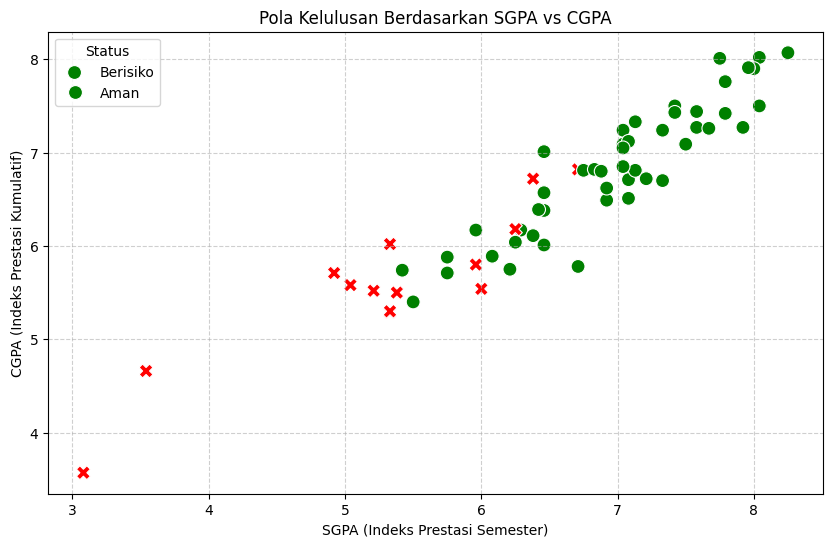

In [23]:
# Prediksi
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"📊 Akurasi Model: {acc * 100:.2f}%")
print("\n--- Laporan Detail ---")
print(classification_report(y_test, y_pred, target_names=['Aman', 'Berisiko']))

# VISUALISASI SCATTER PLOT (Pola Sebaran)
# Kita akan melihat batas antara yang Aman dan Berisiko berdasarkan IPK
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SGPA', y='CGPA', hue='Status_Risiko', data=df, palette={0: 'green', 1: 'red'}, style='Status_Risiko', s=100)
plt.title('Pola Kelulusan Berdasarkan SGPA vs CGPA')
plt.xlabel('SGPA (Indeks Prestasi Semester)')
plt.ylabel('CGPA (Indeks Prestasi Kumulatif)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Status', labels=['Berisiko', 'Aman'])
plt.show()

In [24]:
# --- MASUKKAN NILAI DI SINI ---
input_sgpa = 5.5  # Contoh: IP Semester anjlok
input_cgpa = 6.0  # Contoh: IPK Kumulatif pas-pasan
# ------------------------------

# Prediksi
data_baru = pd.DataFrame([[input_sgpa, input_cgpa]], columns=['SGPA', 'CGPA'])
prediksi = model.predict(data_baru)[0]
probabilitas = model.predict_proba(data_baru)[0]

status_text = "⚠️ BERISIKO (Perlu Bimbingan)" if prediksi == 1 else "✅ AMAN (Lulus)"

print("--- HASIL PREDIKSI SISTEM ---")
print(f"Input Mahasiswa -> SGPA: {input_sgpa}, CGPA: {input_cgpa}")
print(f"Prediksi AI: {status_text}")
print(f"Tingkat Keyakinan: {max(probabilitas) * 100:.1f}%")

--- HASIL PREDIKSI SISTEM ---
Input Mahasiswa -> SGPA: 5.5, CGPA: 6.0
Prediksi AI: ✅ AMAN (Lulus)
Tingkat Keyakinan: 61.0%


In [25]:
import gradio as gr
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier

# ==========================================
# 1. PERSIAPAN MODEL
# ==========================================
filename = 'College Exam Result Dataset data hasil ujiangrade.csv'

# Cek & Load Data
if os.path.exists(filename):
    df = pd.read_csv(filename)
    df = df.dropna(subset=['SGPA', 'CGPA', 'Result Description'])
    
    # Feature Engineering
    df['Status_Risiko'] = df['Result Description'].apply(lambda x: 0 if x == 'PASS' else 1)
    X = df[['SGPA', 'CGPA']]
    y = df['Status_Risiko']
    
    # Training
    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(X, y)
    print("✅ Model Siap!")
else:
    print("❌ File CSV tidak ditemukan.")

# ==========================================
# 2. LOGIKA PREDIKSI
# ==========================================
def prediksi_di_notebook(sgpa, cgpa):
    if sgpa < 0 or sgpa > 10 or cgpa < 0 or cgpa > 10:
        return "⚠️ Error: Nilai harus 0-10", None
    
    data = pd.DataFrame([[sgpa, cgpa]], columns=['SGPA', 'CGPA'])
    pred = model.predict(data)[0]
    prob = model.predict_proba(data)[0]
    
    grafik = {
        "🟢 AMAN": float(prob[0]), 
        "🔴 BERISIKO": float(prob[1])
    }
    
    pesan = "Mahasiswa Aman" if pred == 0 else "Mahasiswa Perlu Bimbingan"
    return pesan, grafik

# ==========================================
# 3. TAMPILAN UI (PUBLIC & FIXED)
# ==========================================
# Perbaikan: Saya menghapus 'theme=...' agar error tadi hilang
with gr.Blocks() as demo: 
    gr.Markdown("## 🎓 Sistem Prediksi Risiko Mahasiswa")
    
    with gr.Row():
        with gr.Column():
            in_s = gr.Slider(0, 10, label="SGPA", value=7.0)
            in_c = gr.Slider(0, 10, label="CGPA", value=7.0)
            btn = gr.Button("Analisis")
        with gr.Column():
            out_t = gr.Textbox(label="Kesimpulan")
            out_g = gr.Label(num_top_classes=2)
            
    btn.click(fn=prediksi_di_notebook, inputs=[in_s, in_c], outputs=[out_t, out_g])

# ---------------------------------------------------------
# PERUBAHAN ADA DI SINI: tambahkan share=True
# ---------------------------------------------------------
print("🚀 Sedang membuat Link Public...")
demo.launch(share=True)

✅ Model Siap!
🚀 Sedang membuat Link Public...
* Running on local URL:  http://127.0.0.1:7865
* Running on public URL: https://9a5a58f8e8f4604445.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
